##Import libraries

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

##import dataset

In [ ]:
!unzip dataset.zip -d /content/


In [8]:
df = pd.read_csv('/content/adult.csv')

##Exploratory data analysis

In [12]:
df.shape


(48842, 15)

In [13]:
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [23]:
print(df['workclass'].dtype == 'object')

True


##Explore categorical variables

In [24]:
categorical = [var for var in df.columns if df[var].dtype == 'object']
print('There are {} categorical variables\n'.format(len(categorical)))
print('The categorical variables are:\n\n', categorical)

There are 9 categorical variables

The categorical variables are:

 ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'gender', 'native-country', 'income']


In [25]:
df[categorical].head()

,workclass,education,marital-status,occupation,relationship,race,gender,native-country,income
0,Private,11th,Never-married,Machine-op-inspct,Own-child,Black,Male,United-States,<=50K
1,Private,HS-grad,Married-civ-spouse,Farming-fishing,Husband,White,Male,United-States,<=50K
2,Local-gov,Assoc-acdm,Married-civ-spouse,Protective-serv,Husband,White,Male,United-States,>50K
3,Private,Some-college,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,United-States,>50K
4,?,Some-college,Never-married,?,Own-child,White,Female,United-States,<=50K


##check for missing values in categorical variables

In [26]:
df[categorical].isnull().sum()

workclass         0
education         0
marital-status    0
occupation        0
relationship      0
race              0
gender            0
native-country    0
income            0
dtype: int64

##Explore workclass variable

In [42]:
print(df['workclass'])

0             Private
1             Private
2           Local-gov
3             Private
4                   ?
             ...     
48837         Private
48838         Private
48839         Private
48840         Private
48841    Self-emp-inc
Name: workclass, Length: 48842, dtype: object


In [28]:
df.workclass.unique()

array(['Private', 'Local-gov', '?', 'Self-emp-not-inc', 'Federal-gov',
       'State-gov', 'Self-emp-inc', 'Without-pay', 'Never-worked'],
      dtype=object)

In [38]:
df.workclass.value_counts()

Private             33906
Self-emp-not-inc     3862
Local-gov            3136
?                    2799
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: workclass, dtype: int64

Text(0.5, 1.0, 'workclass distribution')

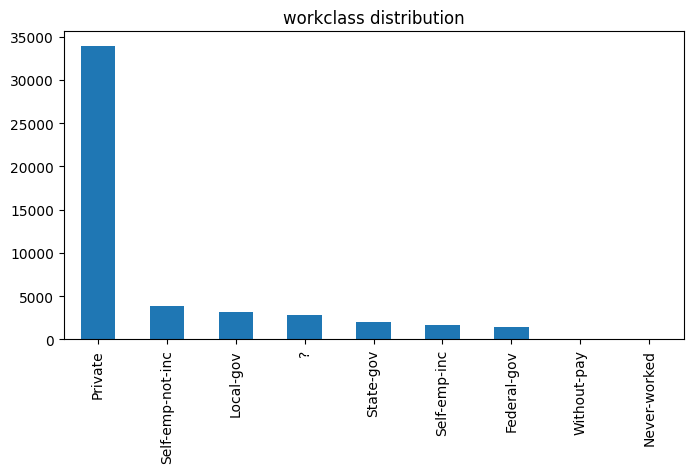

In [41]:
workclassplot = df['workclass'].value_counts()
workclassplot.plot(kind='bar',figsize=(8,4))
plt.title('workclass distribution')


##replace '?' values in workclass variable with 'Nan'

In [43]:
df['workclass'].replace('?', np.NaN, inplace=True)

In [44]:
df.workclass.value_counts()

Private             33906
Self-emp-not-inc     3862
Local-gov            3136
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: workclass, dtype: int64

##Explore occupation variable

In [45]:
df.occupation.unique()

array(['Machine-op-inspct', 'Farming-fishing', 'Protective-serv', '?',
       'Other-service', 'Prof-specialty', 'Craft-repair', 'Adm-clerical',
       'Exec-managerial', 'Tech-support', 'Sales', 'Priv-house-serv',
       'Transport-moving', 'Handlers-cleaners', 'Armed-Forces'],
      dtype=object)

In [46]:
df.occupation.value_counts()

Prof-specialty       6172
Craft-repair         6112
Exec-managerial      6086
Adm-clerical         5611
Sales                5504
Other-service        4923
Machine-op-inspct    3022
?                    2809
Transport-moving     2355
Handlers-cleaners    2072
Farming-fishing      1490
Tech-support         1446
Protective-serv       983
Priv-house-serv       242
Armed-Forces           15
Name: occupation, dtype: int64

In [48]:
df['occupation'].replace('?',np.NaN, inplace = True)

In [49]:
df.occupation.value_counts()

Prof-specialty       6172
Craft-repair         6112
Exec-managerial      6086
Adm-clerical         5611
Sales                5504
Other-service        4923
Machine-op-inspct    3022
Transport-moving     2355
Handlers-cleaners    2072
Farming-fishing      1490
Tech-support         1446
Protective-serv       983
Priv-house-serv       242
Armed-Forces           15
Name: occupation, dtype: int64

In [58]:
for var in categorical:
    df[var].replace('?',np.NaN, inplace = True)

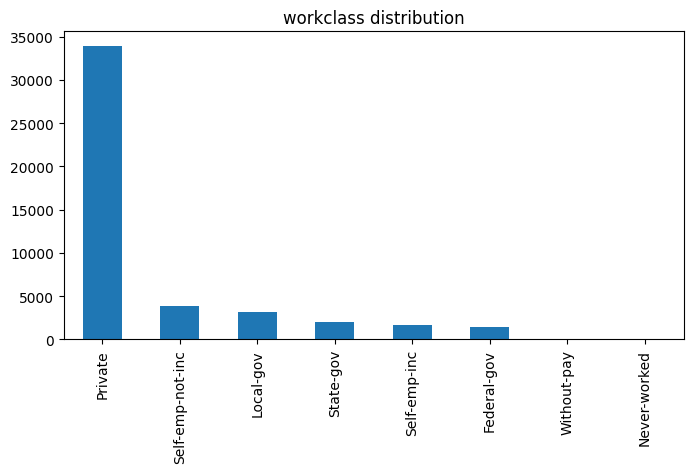

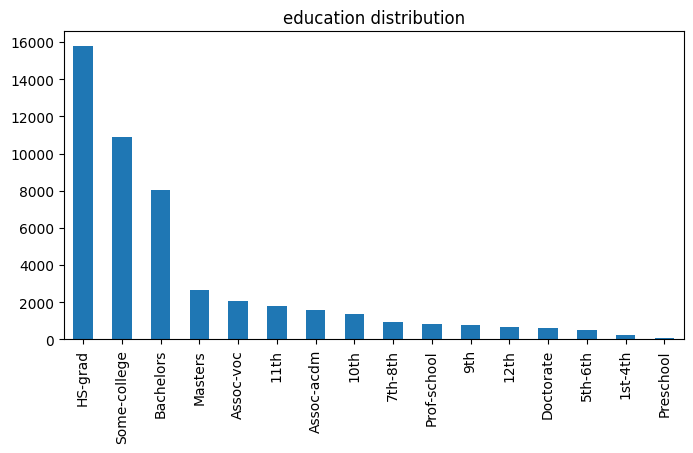

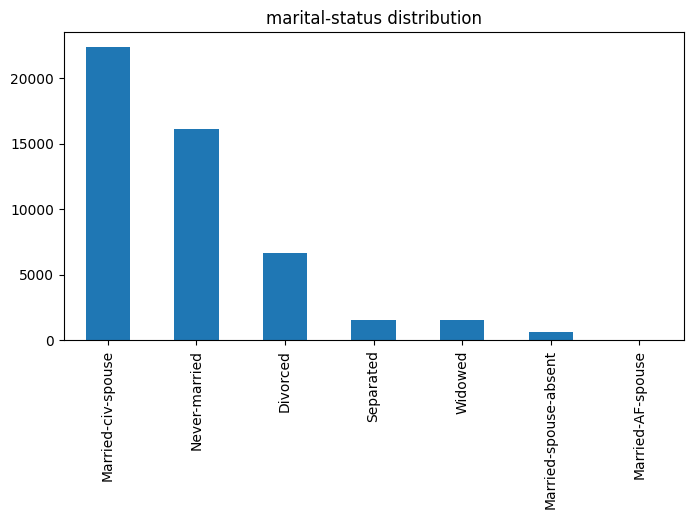

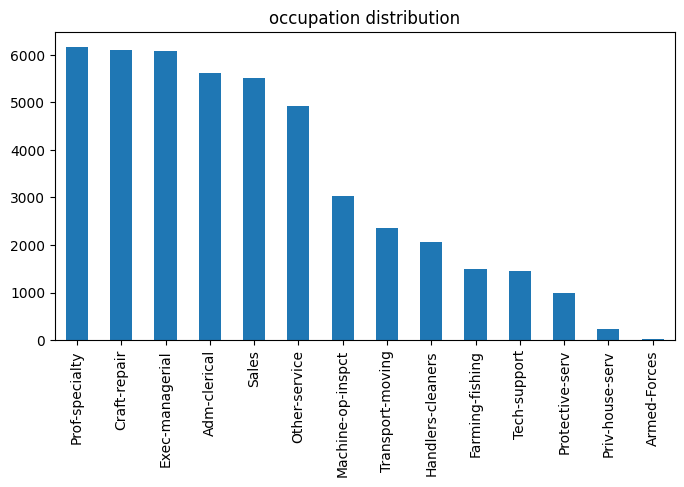

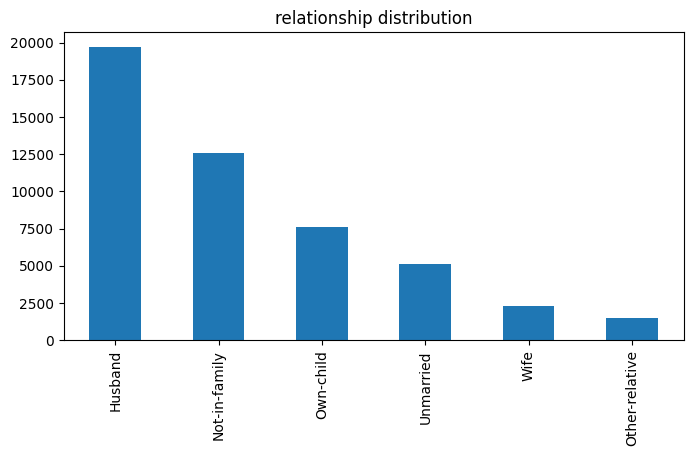

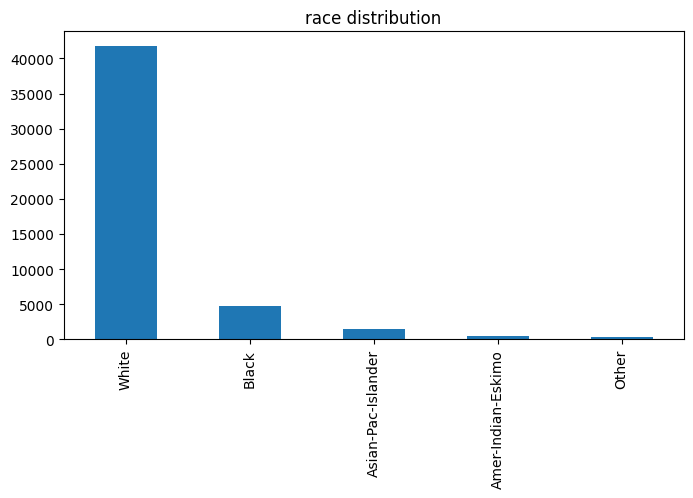

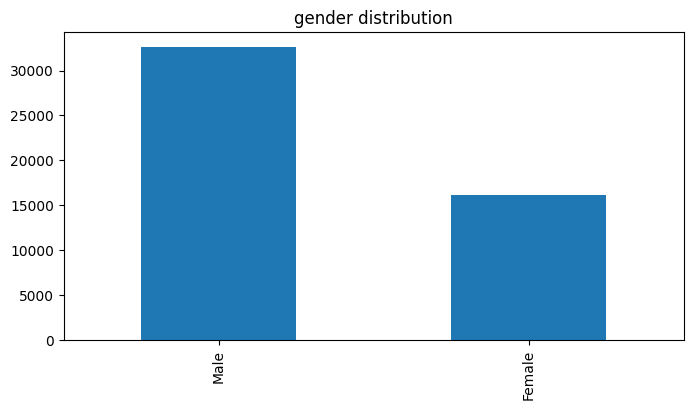

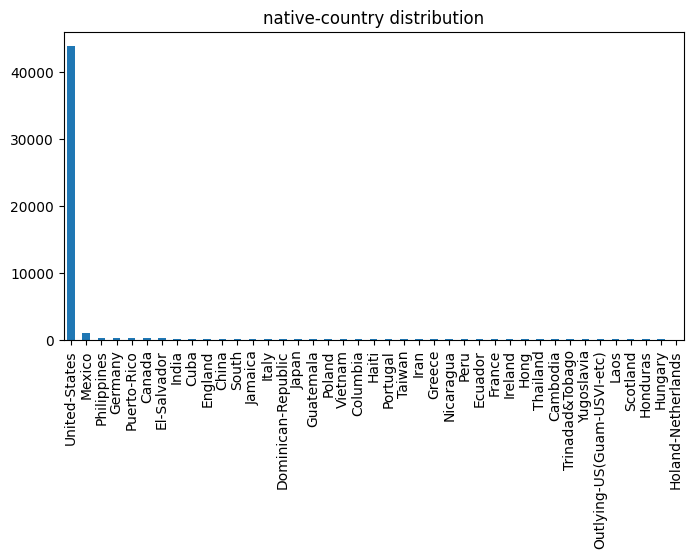

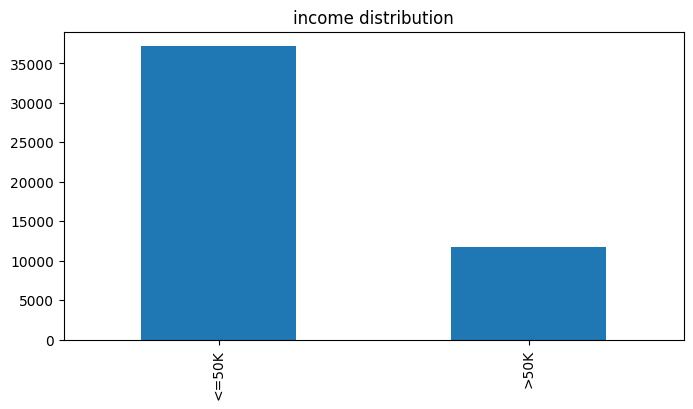

In [67]:
for var in categorical:
  categorical_plot = df[var].value_counts()
  categorical_plot.plot(kind='bar',figsize=(8,4))
  plt.title(var + ' '  + 'distribution')
  plt.show()


##check missing values in categorical variables again

In [59]:
df[categorical].isnull().sum()

workclass         2799
education            0
marital-status       0
occupation        2809
relationship         0
race                 0
gender               0
native-country     857
income               0
dtype: int64

##Number of labels: cardinality

In [68]:
for var in categorical:

    print(var, ' contains ', len(df[var].unique()), ' labels')

workclass  contains  9  labels
education  contains  16  labels
marital-status  contains  7  labels
occupation  contains  15  labels
relationship  contains  6  labels
race  contains  5  labels
gender  contains  2  labels
native-country  contains  42  labels
income  contains  2  labels


##Explore numerical values

In [71]:
numerical = [var for var in df.columns if df[var].dtype !='object']
print('There are {} numerical variables\n'.format(len(numerical)))
print('The numerical variables are :', numerical)

There are 6 numerical variables

The numerical variables are : ['age', 'fnlwgt', 'educational-num', 'capital-gain', 'capital-loss', 'hours-per-week']


In [72]:
df[numerical].head()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
0,25,226802,7,0,0,40
1,38,89814,9,0,0,50
2,28,336951,12,0,0,40
3,44,160323,10,7688,0,40
4,18,103497,10,0,0,30


In [73]:
df[numerical].isnull().sum()

age                0
fnlwgt             0
educational-num    0
capital-gain       0
capital-loss       0
hours-per-week     0
dtype: int64

#Feature engineering

In [74]:
df[categorical].isnull().mean()

workclass         0.057307
education         0.000000
marital-status    0.000000
occupation        0.057512
relationship      0.000000
race              0.000000
gender            0.000000
native-country    0.017546
income            0.000000
dtype: float64

In [83]:
print(df['workclass'].mode()[0])

Private


In [77]:
for col in categorical:
    if df[col].isnull().mean()>0:
        print(col, (df[col].isnull().mean()))
        df[col].fillna(df[col].mode()[0], inplace = True)

workclass 0.05730723557593874
occupation 0.05751197739650301
native-country 0.017546374022357807


In [84]:
df[categorical].isnull().sum()

workclass         0
education         0
marital-status    0
occupation        0
relationship      0
race              0
gender            0
native-country    0
income            0
dtype: int64

In [93]:
X = df.drop(['income'], axis=1)
y = df['income']

In [96]:
X.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States
4,18,Private,103497,Some-college,10,Never-married,Prof-specialty,Own-child,White,Female,0,0,30,United-States


In [94]:
pip install category_encoders

In [98]:
import category_encoders as ce
encoder = ce.OneHotEncoder(cols=['workclass', 'education', 'marital-status', 'occupation', 'relationship',
                                 'race', 'gender', 'native-country'])
X = encoder.fit_transform(X)



In [99]:
X.head()

,age,workclass_1,workclass_2,workclass_3,workclass_4,workclass_5,workclass_6,workclass_7,workclass_8,fnlwgt,...,native-country_32,native-country_33,native-country_34,native-country_35,native-country_36,native-country_37,native-country_38,native-country_39,native-country_40,native-country_41
0,25,1,0,0,0,0,0,0,0,226802,...,0,0,0,0,0,0,0,0,0,0
1,38,1,0,0,0,0,0,0,0,89814,...,0,0,0,0,0,0,0,0,0,0
2,28,0,1,0,0,0,0,0,0,336951,...,0,0,0,0,0,0,0,0,0,0
3,44,1,0,0,0,0,0,0,0,160323,...,0,0,0,0,0,0,0,0,0,0
4,18,1,0,0,0,0,0,0,0,103497,...,0,0,0,0,0,0,0,0,0,0


In [100]:
X.shape

(48842, 105)

#Split data into training and testing

In [113]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [114]:
X_train.shape, X_test.shape

((34189, 105), (14653, 105))

##Feature Scaling

In [115]:
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler().fit(X)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [119]:
print(X_train)

[[-0.5  -1.    1.   ...  0.    0.    0.  ]
 [ 0.25  0.    0.   ...  0.    0.    0.  ]
 [-0.25 -1.    0.   ...  0.    0.    0.  ]
 ...
 [ 0.9   0.    0.   ...  0.    0.    0.  ]
 [-0.4  -1.    0.   ...  0.    0.    0.  ]
 [ 1.1  -1.    0.   ...  0.    0.    0.  ]]


##Model training

In [120]:
from sklearn.naive_bayes import GaussianNB
# instantiate the model
gnb = GaussianNB()
# fit the model
gnb.fit(X_train, y_train)

GaussianNB()

##predict the results

In [122]:
y_pred = gnb.predict(X_test)

##Check accuracy score

In [123]:
from sklearn.metrics import accuracy_score
print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score: 0.7984


In [124]:
#check for overfitting or underfitting
print('Training set score: {:.4f}'.format(gnb.score(X_train, y_train)))
print('Test set score: {:.4f}'.format(gnb.score(X_test, y_test)))

Training set score: 0.8012
Test set score: 0.7984
